In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from os import path
import numpy as np
import cv2 as cv
import trimesh
import sys
import os

# Required to import local modules
repo_root = path.abspath(path.join('..', '..'))
if repo_root not in sys.path:
    sys.path.append(repo_root)

# Our local modules
import ds_tools.calibration.calibrate as clb
from ds_tools.shared import util

# Load and undistort relevant images

<IPython.core.display.Javascript object>


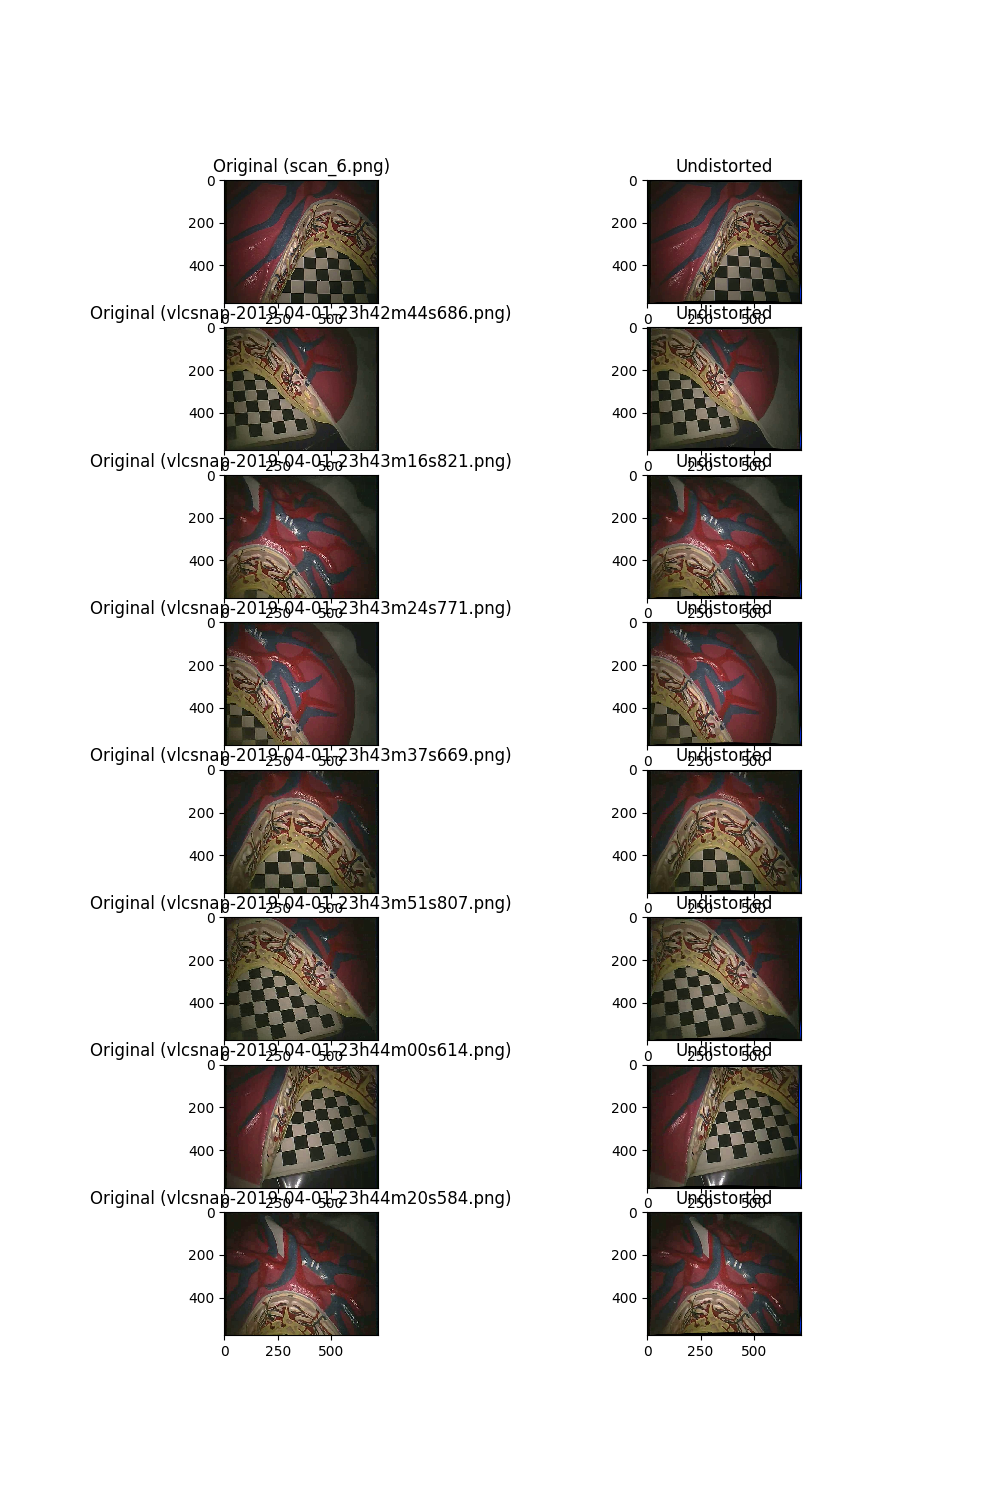

In [2]:
data_dir = util.get_data_dir()
intrinsics_file = path.join(data_dir, 'refined_intrinsics.json')
cam_matrix, dist_coeffs, width, height = util.load_intrinsics(intrinsics_file)

new_cam_matrix, roi = cv.getOptimalNewCameraMatrix(cam_matrix, dist_coeffs,
                                                   (width, height), 1, (width, height))

image_folder = path.join(data_dir, 'images_to_undistort')
all_images = sorted(os.listdir(image_folder))
image_count = len(all_images)

fig, ax = plt.subplots(nrows=image_count, ncols=2, figsize=(10, 15))
for i in range(image_count):
    file = all_images[i]
    image = cv.imread(path.join(image_folder, file))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    fixed = cv.undistort(image, cam_matrix, dist_coeffs, None, new_cam_matrix)
    ax[i, 0].set_title('Original ({})'.format(file))
    ax[i, 0].imshow(image)
    ax[i, 1].set_title('Undistorted')
    ax[i, 1].imshow(fixed)
    
    
    out = cv.cvtColor(fixed, cv.COLOR_RGB2BGR)
    cv.imwrite(path.join(image_folder, 'undistorted_' + file), out)
